# Práctica 4 de IA

## 2. Construcción de un clasificador en una base de datos real (5 puntos)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv('./data/german_credit_data.csv', sep=';')
# Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
# This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix

print(df.shape)
df.head(5)

(1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
class_label = 'default'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['account_check_status ', 'duration_in_month ', 'credit_history ', 'purpose ', 'credit_amount ', 'savings ', 'present_emp_since ', 'installment_as_income_perc ', 'personal_status_sex ', 'other_debtors ', 'present_res_since ', 'property ', 'age ', 'other_installment_plans ', 'housing ', 'credits_this_bank ', 'job ', 'people_under_maintenance ', 'telephone ', 'foreign_worker']


**Estadísticos básicos de cada atributo:**

In [4]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Datos codificados de forma numérica**

In [5]:
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("default"/"no default"):**

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# otros clasificadores (del notebook p4_01)

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=10) # 10-fold cross-validation
print('Precisión en cada una de las particiones: ', scores)
print('Estimación de la precisión por validación cruzada: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Precisión en cada una de las particiones:  [0.67 0.64 0.72 0.66 0.64 0.71 0.6  0.71 0.62 0.66]
Estimación de la precisión por validación cruzada: 0.66 +/- 0.04


## Responde aquí a las siguientes preguntas:

* Haz una gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos. Si es más conveniente, utiliza gráficas en escala logarítmica para alguno de los ejes (`semilogx`, `semilogy`, `loglog`).
    * **Graficas realizadas a continuación**
<br><br>
* Utilizando los conceptos de sub- y sobreajuste:
    * Comenta los resultados cuando el número de vecinos es pequeño.
        * **Se puede observar que en k = 5 se produce un sub-ajuste, ya que la precision disminuye drasticamente, aunque luego se ve como remonta teniendo su maximo en k = 14**
    * Comenta los resultados cuando el número de vecinos es grande.
        * **Se puede observar como a partir de k = 14 la tendencia es bajista y a partir de k = ~100 la precision no varía, esto es porque se tienen en cuenta todos los datos de la muestra. Se podría decir que a partir de k = 14 es sobre ajuste.**
    * Explica el significado del valor de la precisión cuando el número de vecinos toma el valor mayor posible.
        * **Esto es porque se tienen en cuenta todos los datos de la muestra, es decir, cuando k = tamaño set aprendizaaje. k no puede ser mayor quel set de aprendizaje.
        Si k cumple esta condicion, se asemeja mas a una estimación bayesiana.**

* ¿Cuál es la mejor precisión que se alcanza con k-nn y para qué k (valor de `n_neighbours`)?
    * **La mejor precisión es 0.716 y se obtiene con k = 14**
<br><br>
* ¿Cuál es la mejor precisión que se alcanza con un árbol de decisión y con qué profundidad máxima (valor de `max_depth`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con la profundidad máxima del árbol. Comenta los resultados.
    * **La mejor precición es 0.734 y se obtiene con un arbol de profundidad = 4**
<br><br>
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con una sola capa oculta y con qué configuración (valor de `hidden_layer_sizes`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de nodos en la capa oculta. Comenta los resultados.
    * **Para las hidden layers, lo que hemos probado es con numeros entre 1 y 30 realizando pruebas. Hemos obtenido que la mejor precision es 0.769 y se obtiene con una layer y un total de 30 capas ocultas** 
<br><br>
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con varias capas ocultas y con qué configuración? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de capas ocultas, suponiendo constante el número de nodos en cada capa oculta. Comenta los resultados.
    * ****
<br><br>
* Resume los resultados y conclusiones del estudio realizado.

**Además de gráficas, puede ser conveniente presentar los resultados en forma de tablas.**


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# otros clasificadores (del notebook p4_01)

Treeclf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(Treeclf, X, y, cv=10) # 10- VALIDACION CRUZADA
print('Precisión en cada una de las particiones: ', scores)
print('Estimación de la precisión por validación cruzada: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Precisión en cada una de las particiones:  [0.8  0.71 0.72 0.72 0.75 0.72 0.69 0.74 0.75 0.68]
Estimación de la precisión por validación cruzada: 0.73 +/- 0.03


In [8]:
from ctypes import sizeof
from sklearn.neighbors import KNeighborsClassifier

score=[]
num=[]

#Aqui buscamos el mejor k que nos da el mejor score

for i in range(1,500):
    Neighborclf = KNeighborsClassifier(n_neighbors=i) # DecisionTreeClassifier(max_depth=3)
    scores = cross_val_score(Neighborclf, X, y, cv=5) # 10-fold cross-validation
    num.append(i)
    media = scores.mean()
    score.append(media)
best = max(score)
print("El mejor score es: " + str(best) + " con k = " + str(score.index(best)+1))

El mejor score es: 0.716 con k = 14


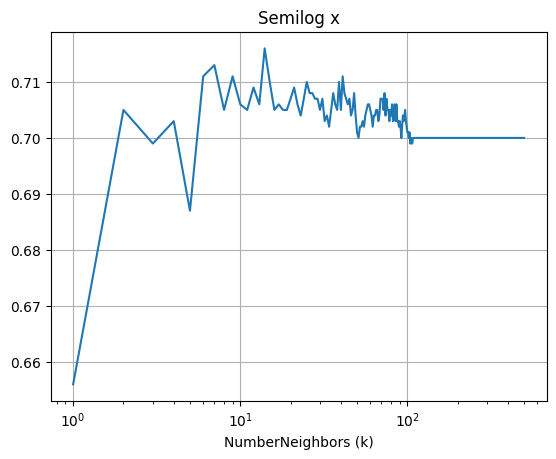

In [9]:
import matplotlib.pyplot as plt

#Gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos.
plt.semilogx(num,score)
plt.title("Semilog x")
plt.xlabel("NumberNeighbors (k)")
plt.grid()

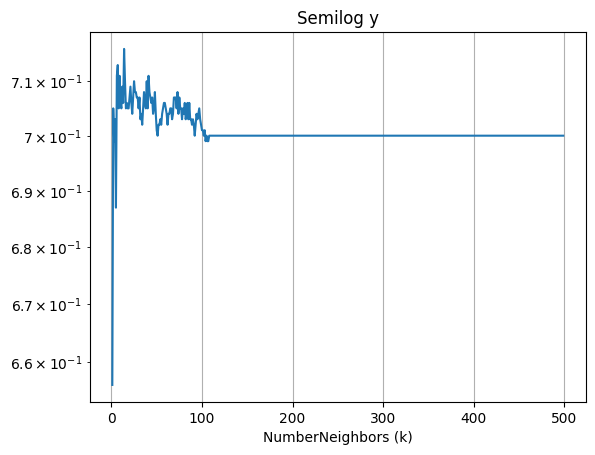

In [10]:
import matplotlib.pyplot as plt

#Gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos.

plt.semilogy(num,score)
plt.title("Semilog y")
plt.xlabel("NumberNeighbors (k)")
plt.grid()

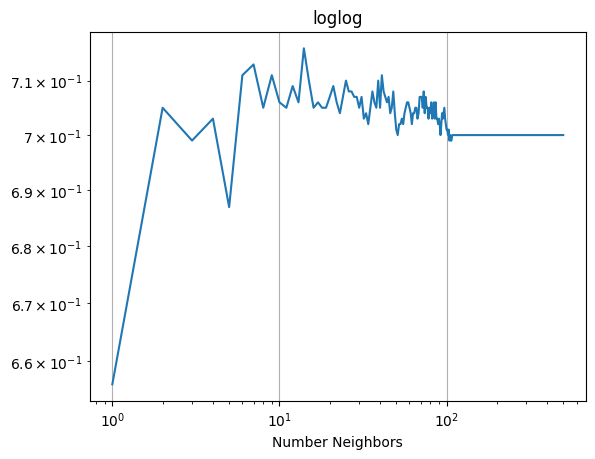

In [11]:
import matplotlib.pyplot as plt

#Gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos.

plt.loglog(num,score)
plt.title("loglog")
plt.xlabel("Number Neighbors")
plt.grid()

**Se puede observar un pico de precision en k = 14 en todas las pruebas**

In [12]:


score=[]
num = []
for i in range(1,500):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, X, y, cv=5) # 10-fold cross-validation
    num.append(i)
    media = scores.mean()
    score.append(media)
best = max(score)
print("El mejor score es: " + str(best) + " con profundidad= " + str(score.index(best)+1))

El mejor score es: 0.736 con profundidad= 4


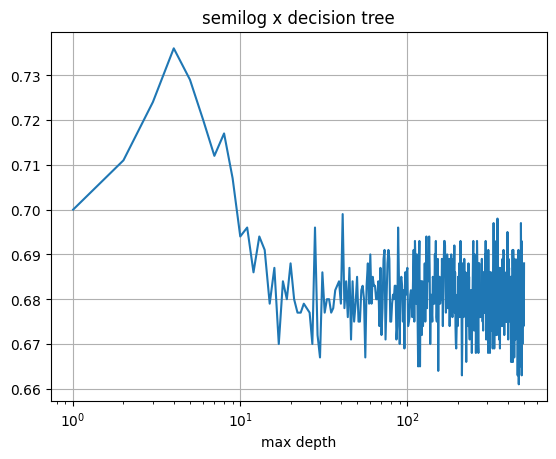

In [13]:
import matplotlib.pyplot as plt

plt.semilogx(num,score)
plt.title("semilog x decision tree")
plt.xlabel("max depth")
plt.grid()

In [14]:
from sklearn.neural_network import MLPClassifier
import random

score=[]
lista_capa=[]

#Prueba con 50 neuronas por capa
for i in range(1,20):
    c = [50 for _ in range(1, i+1)]
    clf= MLPClassifier(hidden_layer_sizes=c ,max_iter=1000,alpha=0.0)
    scores = cross_val_score(clf, X, y, cv=5)
    media = scores.mean()
    score.append(media)
    lista_capa.append(c)

best = max(score)
print("El mejor score es: " + str(best) + " layers = " + str(score.index(best)+1))
print("hidden_layer_sizes: " + str(lista_capa[score.index(best)]))

El mejor score es: 0.7689999999999999 layers = 1
hidden_layer_sizes: [50]


ValueError: x and y must have same first dimension, but have shapes (499,) and (19,)

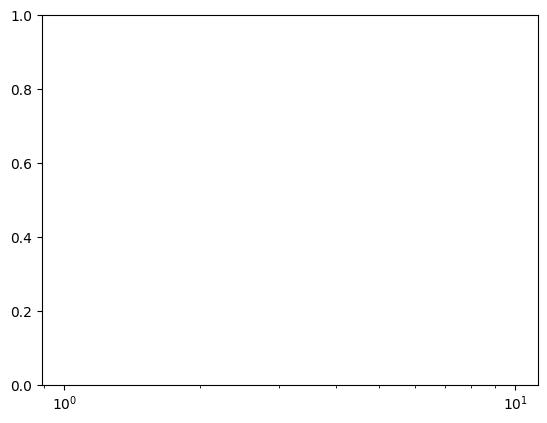

In [16]:
import matplotlib.pyplot as plt

plt.semilogx(num,score)
plt.title("semilog x MLP")
plt.xlabel("hidden layers")
plt.grid()

## Procesamiento

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados.

En este apartado vas a investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados: construcción y selección de atributos, preprocesamiento (detección de outliers, missing values, centrado y escalado).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas).
Usa tablas, gráficas y código, según sea necesario, para ilustrar tus observaciones.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

## ¿Cómo se determina el valor de los hiperparámetros?

Para determinar el valor de los hiperparámetros de un modelo realizaremos una búsqueda en una rejilla. De entre los valores considerados seleccionaremos los que maximicen la estimación por validación cruzada (K = 10) de la tasa de acierto.

Adapta el código que encontrarás en 
[https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)
a este problema. 

En los tutoriales
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](
    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
hay información sobre cada uno de los hiper-parámetros. 
Puedes elegir el conjunto de hiperparametros en el que se realiza la optimización. 
Antes de elegir la rejilla de hiperparámetros, asegúrate de que entiendes su para asegurarte que tiene sentido la búsqueda.

In [17]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.98

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [ ]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import cross_val_score  

dataset = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')

X = dataset.iloc[:, 0:11].values  
y = dataset.iloc[:, 11].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=0)  

escaladorxd = StandardScaler()  
X_train = escaladorxd.fit_transform(X_train)  
X_test = escaladorxd.transform(X_test) 

classifier = KNeighborsClassifier(n_neighbors=10)  

cvs = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

print("cross_val_score: ", cvs)  

In [ ]:
print("mediana: ", cvs.mean()) 

In [ ]:
print(cvs.std())  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

params = {  
    'n_neighbors': [10, 20, 30, 5],
    'weights': ['distance'],
}

gscv = GridSearchCV(estimator=classifier,  
                     param_grid=params,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)


gscv.fit(X_train, y_train)  

In [ ]:
best_parameters = gscv.best_params_  
print(best_parameters) 

## ¿Cómo se estima el error de generalización?

Estimaremos el error de generalización de cada clasificador usando *Nested Cross Validation*. 


Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html para resolver este problema con una red neuronal. 


Average difference of 0.005400 with std. dev. of 0.005499.


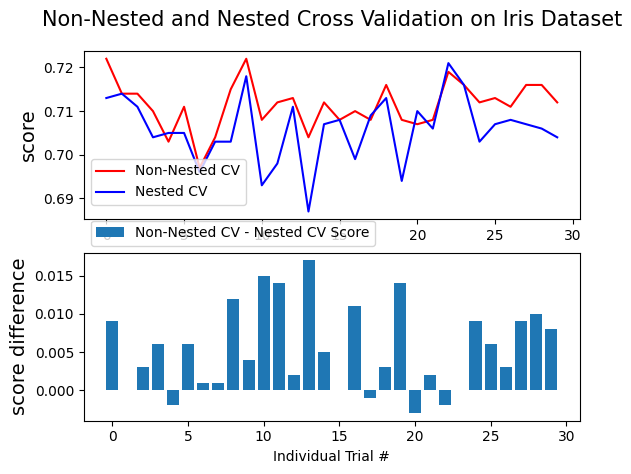

In [18]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
dataset = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
feature_names = list(dataset.columns)
feature_names.remove('Class')
X_iris = dataset[feature_names].values
y_iris = dataset['Class'].values

# Set up possible values of parameters to optimize over
p_grid = {'n_neighbors': [10, 20, 30, 5],
            'weights': ['distance']}

# We will use a Support Vector Classifier with "rbf" kernel
svm = KNeighborsClassifier(n_neighbors=10)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()


Average difference of 0.003933 with std. dev. of 0.007384.


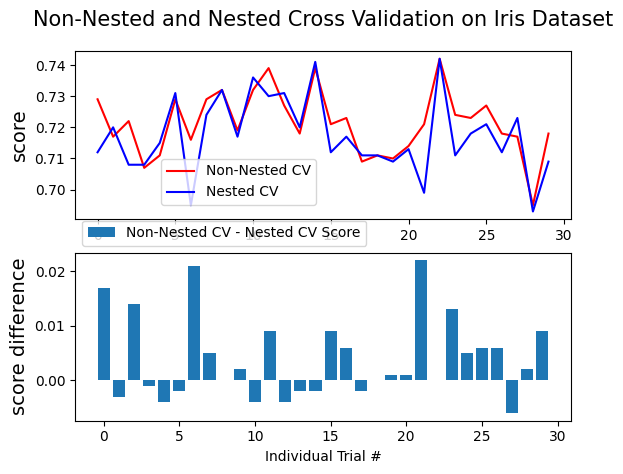

In [19]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
dataset = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
feature_names = list(dataset.columns)
feature_names.remove('Class')
X_iris = dataset[feature_names].values
y_iris = dataset['Class'].values

# Set up possible values of parameters to optimize over
p_grid = {'criterion': ['entropy'],
            'max_depth': [5 ,10 ,15 ,20]}


# We will use a Support Vector Classifier with "rbf" kernel
svm =  DecisionTreeClassifier(criterion='entropy',
                                       max_depth=5)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()


Average difference of 0.005800 with std. dev. of 0.008581.


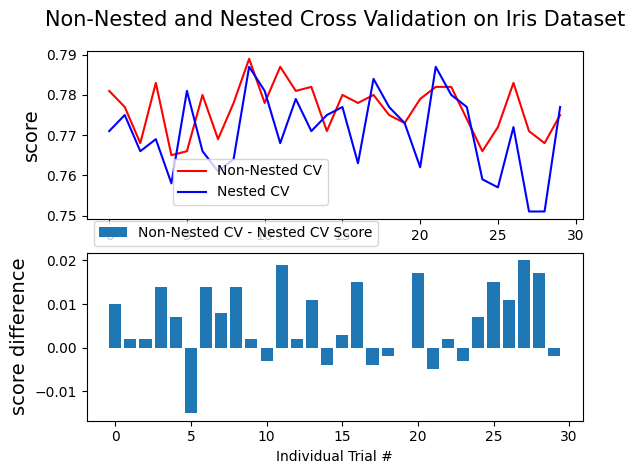

In [5]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
dataset = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
feature_names = list(dataset.columns)
feature_names.remove('Class')
X_iris = dataset[feature_names].values
y_iris = dataset['Class'].values

# Set up possible values of parameters to optimize over
p_grid = {'hidden_layer_sizes': [50,20,10,],
            'max_iter': [2000],
            'alpha': [0.0]}


# We will use a Support Vector Classifier with "rbf" kernel
svm =  MLPClassifier(hidden_layer_sizes=(50,),max_iter=2000,alpha=0.0)

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()


## ¿Cuál es el mejor clasificador?

* De acuerdo con los resultados de los anteriores apartados, indica cuál es el mejor clasificador encontrado.
    * **Segun los resultados, el clasificador que obtiene mejores resultados es el MLPClassifier, ya que en alguna iteración ha conseguido un socore de hasta 0.79 y un promedio mas alto que le resto de clasificadores, alrededor de 0.775.**
* ¿Cuáles son los valores de los hiperparámetros utilizados para configurar y entrenar tal clasificador?
    * **Hemos asigando estos parametros: 'hidden_layer_sizes': [50,20,10,], 'max_iter': [2000], 'alpha': [0.0]**
* ¿cuáles son los valores de los parámetros del clasificador entrenado?
    * **Los valores son: hidden_layer_sizes=(50,),max_iter=2000,alpha=0.0**
* Proporciona una estimación del error de generalización por validación cruzada, así como de la incertidumbre de dicha estimación.


*knn             Average difference of 0.005400 with std. dev. of 0.005499.* <br/> <br/>
*Tree            Average difference of 0.003933 with std. dev. of 0.007384.* <br/> <br/>
*MLPClassifier   Average difference of 0.005600 with std. dev. of 0.007031.*


## Conclusiones.
Resume los resultados y conclusiones del estudio que has realizado.

**Hemos llegado a la conclusión de que el mejor clasificador es el MLPClassifier**
